# Exercise 1

In [82]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

data = digits["data"]
print(data.shape)
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)


<div style="color: green; font-weight:
bold">Same as the solution </div>

Shape of img:  (8, 8)


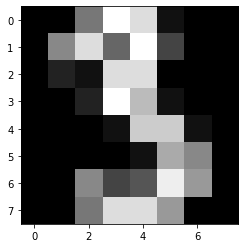

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# find all the indices of images that contain the digit 3 and take first
index = np.where(target == 3)[0][0]

# get the selected image
img = images[index]
assert 2 == len(img.shape)
print('Shape of img: ', img.shape)
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest") # also try interpolation="bicubic" plt.show()

<div style="color: green; font-weight:
bold">Same as the solution </div>

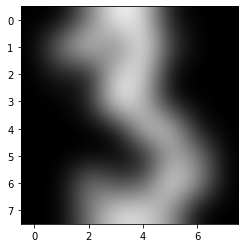

In [84]:
plt.imshow(img, interpolation="bicubic")
plt.show()

<div style="color: green; font-weight:
bold">Same as the solution </div>

### Filter for 3 and 9

Filtered gold labels: 
 9
Filtered image flatten: 
 [ 0.  0.  5. 15.  7.  0.  0.  0.  0.  0. 14. 16. 16.  5.  0.  0.  0.  0.
 13. 14. 14. 15.  0.  0.  0.  0.  3. 11. 14. 16.  3.  0.  0.  0.  0.  0.
  6. 16.  2.  0.  0.  0.  0.  0.  4. 16.  7.  0.  0.  0.  0.  1. 11. 16.
  6.  0.  0.  0.  4. 15. 16. 10.  0.  0.]
Filtered image matrix: 
 [[ 0.  0.  5. 15.  7.  0.  0.  0.]
 [ 0.  0. 14. 16. 16.  5.  0.  0.]
 [ 0.  0. 13. 14. 14. 15.  0.  0.]
 [ 0.  0.  3. 11. 14. 16.  3.  0.]
 [ 0.  0.  0.  0.  6. 16.  2.  0.]
 [ 0.  0.  0.  0.  4. 16.  7.  0.]
 [ 0.  0.  0.  1. 11. 16.  6.  0.]
 [ 0.  0.  4. 15. 16. 10.  0.  0.]]


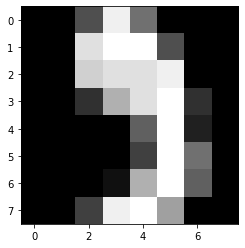

In [85]:
digits_to_filter = [3, 9]
filtered_target_9 = []
filtered_target_3 = []
filtered_target = []
filtered_images_9 = []
filtered_images_3 = []
filtered_images = []
filtered_data_9 = []
filtered_data_3 = []
filtered_data = []

indices = None

for digit in digits_to_filter:
    # find all the indices of images that contain the digit
    indices = np.where(target == digit)[0]
    # get the images and target labels
    imgs = images[indices]
    target_labels = np.full((len(indices),), digit)
    data_filter = data[indices]
    # add the images and target labels to the filtered lists
    if digit == 9:
        filtered_images_9.append(imgs)
        filtered_data_9.append(data_filter)
        filtered_target_9.append(target_labels)
    else:
        filtered_images_3.append(imgs)
        filtered_data_3.append(data_filter)
        filtered_target_3.append(target_labels)

filtered_images = filtered_images_3 + filtered_images_9
filtered_data = filtered_data_3 + filtered_data_9
filtered_target = filtered_target_3 + filtered_target_9

# concatenate the images and target labels and shuffle the list
filtered_images = np.concatenate(filtered_images, axis=0)
filtered_target = np.concatenate(filtered_target, axis=0)
filtered_data = np.concatenate(filtered_data, axis=0)
print('Filtered gold labels: \n', filtered_target[205])
print('Filtered image flatten: \n', filtered_data[205])
print('Filtered image matrix: \n', filtered_images[205])
plt.imshow(filtered_images[205], interpolation="nearest")
plt.show()

<div style="color: green; font-weight:
bold">Filtering could have been easier as shown in the solution with a mask = np.logical_or(3,9)</div>

### Split data into test and train

In [86]:
from sklearn import model_selection
X_all = filtered_data 
y_all = filtered_target
X_train , X_test , y_train , y_test = model_selection.train_test_split(filtered_data, filtered_target,
test_size = 0.4, random_state = 0)
print(X_test.shape, y_test.shape)

(146, 64) (146,)


<div style="color: green; font-weight:
bold">Same as the solution </div>

# Exercise 2

## 2.1

To facilitate visualization, you should construct a 2-dimensional feature space with any formula over the 64 original pixels you can come up with. You may, for example, choose two pixels that seem to have a big inuence for the distinction between 3's and 9's. To identify suitable pixels, you may want to look at the average images for the two classes  pixels that tend to be bright in one class and dark in the other are good candidates. You can also use some clever linear or non-linear combination of multiple pixels into 2 features, for example: f ̃ = 0.3f + 42 f13 and f ̃ = f − f .
1 23 f64 2 33 62 Of course, the quality of your features determines the achievable error and therefore is a limiting factor for the quality of your predictions. Your dimension reduction procedure should be callable
through a function features2d:
features = features2d(x)
where x is a #instances × 64 matrix and features has shape #instances × 2.

In [87]:
# compute the average values over all 3 images and over all 9 images separately
avg_3 = np.round(np.mean(filtered_data_9[0], axis=0), 1)
avg_9 = np.round(np.mean(filtered_data_3[0], axis=0), 1)

print("Average values over all 3 images:")
print(avg_3)

print("Average values over all 9 images:")
print(avg_9)

# compute the difference between the two averages
diff = np.abs(avg_3 - avg_9)

# find the coordinates of the maximum difference
max_diff_coords = np.argpartition(-diff.flatten(), 10)[:10]

print("List of 10 most different coordinates between 3 and 9:")
print(max_diff_coords)

Average values over all 3 images:
[ 0.   0.1  5.7 11.8 11.3  5.9  1.6  0.1  0.   2.4 12.7  9.6 10.1 11.4
  2.6  0.1  0.   3.7 12.5  5.6  8.3 14.1  3.2  0.   0.   2.  10.4 12.2
 13.2 14.1  3.8  0.   0.   0.2  2.9  5.2  5.1 11.6  4.8  0.   0.   0.2
  0.5  0.6  2.5  9.7  5.8  0.   0.   0.7  6.1  5.   5.8 10.5  5.2  0.1
  0.   0.1  5.7 12.  13.1  8.9  2.1  0.1]
Average values over all 9 images:
[ 0.   0.6  8.4 14.2 14.2  7.5  0.8  0.   0.   4.2 12.7  9.  11.3 12.
  2.1  0.   0.   2.2  3.7  3.1 12.   9.3  0.8  0.   0.   0.3  1.5  8.9
 14.3  5.6  0.1  0.   0.   0.1  1.   5.6 12.  11.3  2.2  0.   0.   0.4
  1.4  1.   4.4 12.1  6.3  0.   0.   0.9  7.1  6.2  8.3 13.   5.9  0.1
  0.   0.5  9.3 14.7 14.   8.7  1.4  0.1]
List of 10 most different coordinates between 3 and 9:
[29 36 18 26 21 30 58 20 27  4]


<div style="color: green; font-weight:
bold">Flattening the diff array is unnecessary since it is a 1D array</div>

##### Features with max diff pixels as features

In [88]:
# compute the 2D features based on two pixels

def features2d(x):
    # compute the 2D features based on two pixels
    pixel1 = max_diff_coords[0]  # choose the first pixel
    pixel2 = max_diff_coords[1]  # choose the second pixel
    features = np.zeros((len(x), 2))
    features[:, 0] = x[:, pixel1]
    features[:, 1] = x[:, pixel2]
    return features

# test the function with some example data
X_all_2d = features2d(X_all)
X_all_2d[:10]


array([[ 1., 12.],
       [ 2., 15.],
       [12., 13.],
       [ 3.,  9.],
       [ 2., 15.],
       [ 6., 10.],
       [ 8., 12.],
       [ 2., 15.],
       [12., 13.],
       [12., 15.]])

<div style="color: green; font-weight:
bold">Finding the most relevant pixels and using them to calculate the features is not what the solution did but was also allowed. But why not use more of them instead of just 2. Maybe the name X_all_2d is not ideal because X is used for the matrix with the pixel data of the instances</div>

##### Features from max differences per number

In [89]:
from itertools import combinations

def get_diff_pairs(lst):
    # Generate all combinations of index pairs
    index_pairs = list(combinations(range(len(lst)), 2))
    
    # Calculate the absolute differences for each index pair
    differences = [(i, j, abs(lst[i] - lst[j])) for i, j in index_pairs]
    
    # Sort the differences in ascending order
    sorted_differences = sorted(differences, key=lambda x: x[2], reverse=True)
    
    return sorted_differences

In [90]:
def find_max_diff_indice_tuples(diff_tuples, avg_list, threshold = 5):
    # Find the indices where the corresponding elements in the second list have a low difference
    indices = [candidate for candidate in diff_tuples if np.abs(avg_list[candidate[0]] - avg_list[candidate[1]]) <= threshold]
    # for i in indices:
        # print('Diff number one: ', i[2])
        # print('Diff number two: ', avg_list[i[0]] - avg_list[i[1]])
    return indices

In [91]:
diff_pairs_three = get_diff_pairs(avg_3)
diff_pairs_nines = get_diff_pairs(avg_9)
print("List of 10 most different pairs between 3 and 9:")
print(diff_pairs_three[:10])
print(diff_pairs_nines[::-1][:10])

List of 10 most different pairs between 3 and 9:
[(0, 21, 14.1), (0, 29, 14.1), (8, 21, 14.1), (8, 29, 14.1), (16, 21, 14.1), (16, 29, 14.1), (21, 23, 14.1), (21, 24, 14.1), (21, 31, 14.1), (21, 32, 14.1)]
[(55, 63, 0.0), (48, 56, 0.0), (47, 56, 0.0), (47, 48, 0.0), (42, 62, 0.0), (40, 56, 0.0), (40, 48, 0.0), (40, 47, 0.0), (39, 56, 0.0), (39, 48, 0.0)]


In [92]:
features_nine = find_max_diff_indice_tuples(get_diff_pairs(avg_3), avg_9, 0.1)[:2]
features_three = find_max_diff_indice_tuples(get_diff_pairs(avg_9), avg_3, 0.1)[:2]
best_features_nine = [candidate[:2] for candidate in features_nine]
best_features_three = [candidate[:2] for candidate in features_three]
print('Features nine: ', features_nine[:10])
print('Features three: ', features_three[:10])
print('Best feature for 3: ', best_features_three)
print('Best feature for 9: ', best_features_nine)

Features nine:  [(29, 35, 8.899999999999999), (21, 58, 8.399999999999999)]
Features three:  [(26, 53, 11.5), (36, 51, 5.8)]
Best feature for 3:  [(26, 53), (36, 51)]
Best feature for 9:  [(29, 35), (21, 58)]


In [93]:
def features2d_combined_diff(x):
    features = np.zeros((len(x), 2))
    features[:, 0] = np.abs(x[:, best_features_nine[0][0]] - x[:, best_features_nine[0][1]])
    features[:, 1] = np.abs(x[:, best_features_three[0][0]] - x[:, best_features_three[0][1]])
    return features


# test the function with some example data
X_all_2d_combined_diff = features2d_combined_diff(X_all)
X_all_2d[:10]

array([[ 1., 12.],
       [ 2., 15.],
       [12., 13.],
       [ 3.,  9.],
       [ 2., 15.],
       [ 6., 10.],
       [ 8., 12.],
       [ 2., 15.],
       [12., 13.],
       [12., 15.]])

<div style="color: green; font-weight:
bold">This part could be explained a bit better because I am not sure why you do this and what exactly it does </div>

## 2.2

#### Plot with simple feature distribution

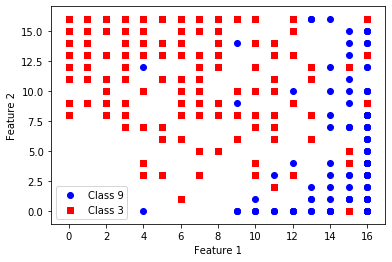

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# assume X_all is your instances x 2 feature list and Y_all is your list of gold labels
X1 = X_all_2d[:,0]  # extract the first feature from X_all
X2 = X_all_2d[:,1]  # extract the second feature from X_all

# create a scatter plot with two different markers for the two classes
plt.scatter(X1[y_all==9], X2[y_all==9], marker='o', color='blue', label='Class 9')
plt.scatter(X1[y_all==3], X2[y_all==3], marker='s', color='red', label='Class 3')

# set the labels for the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


<div style="color: green; font-weight:
bold">Same as the solution </div>

#### Plot with combined feature distribution

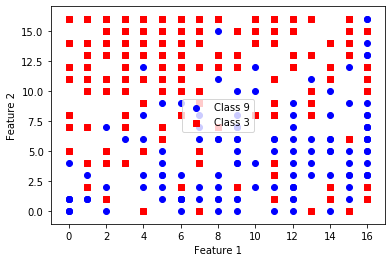

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# assume X_all is your instances x 2 feature list and Y_all is your list of gold labels
X1_comb = X_all_2d_combined_diff[:,0]  # extract the first feature from X_all
X2_comb = X_all_2d_combined_diff[:,1]  # extract the second feature from X_all

# create a scatter plot with two different markers for the two classes
plt.scatter(X1_comb[y_all==9], X2_comb[y_all==9], marker='o', color='blue', label='Class 9')
plt.scatter(X1_comb[y_all==3], X2_comb[y_all==3], marker='s', color='red', label='Class 3')

# set the labels for the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


<div style="color: green; font-weight:
bold">Good that you tried a different feature function, but I am not sure if it is much better. Also its hard to see that some squares are plotted on top of circles. So maybe use a cross like the solution.</div>

## 2.3

### Nearest mean descision boundary

In [96]:
def nearest_mean(training_features, training_labels, test_features):
    # Compute the means of each class in the training set
    class3_mean = np.mean(training_features[np.argwhere(training_labels == -1)], axis=0)
    class9_mean = np.mean(training_features[np.argwhere(training_labels == 1)], axis=0)
    predicted_labels = []
    
    # Assign each test instance to the class with the closest mean
    for i in range(len(test_features)):
        test_instance = test_features[i]
        dist1 = np.linalg.norm(test_instance - class3_mean)
        dist2 = np.linalg.norm(test_instance - class9_mean)
        if dist1 < dist2:
            # Abbend -1 for class 3
            predicted_labels.append(-1)
        else:
            # Abbend 1 for class 9
            predicted_labels.append(1)
    return np.array(predicted_labels), np.array([class3_mean, class9_mean])


<div style="color: green; font-weight:
bold">Looks correct</div>

In [97]:
# Preparation of the data
X_train_2d = features2d(X_train)
X_test_2d = features2d(X_test)
X_train_2d_combined_diff = features2d_combined_diff(X_train)
X_test_2d_combined_diff = features2d_combined_diff(X_test)
y_train = np.where(y_train == 3, -1, np.where(y_train == 9, 1, y_train))
y_test = np.where(y_test == 3, -1, np.where(y_test == 9, 1, y_test))

In [98]:
# train the classifier and predict the labels for the test data
predicted_labels_test, class_means = nearest_mean(X_train_2d, y_train, X_test_2d)
predicted_labels_train = nearest_mean(X_train_2d, y_train, X_train_2d)[0]
predicted_labels_test_comb ,class_means_comb =  nearest_mean(X_train_2d_combined_diff, y_train, X_test_2d_combined_diff)
predicted_labels_train_comb = nearest_mean(X_train_2d_combined_diff, y_train, X_train_2d_combined_diff)[0]

# calculate the errors on the training and test data
train_error = np.mean(predicted_labels_train != y_train)
test_error = np.mean(predicted_labels_test != y_test)

train_error_combined_diff = np.mean(predicted_labels_train_comb != y_train)
test_error_combined_diff = np.mean(predicted_labels_test_comb != y_test)

# print the errors
print(f"Training error: {train_error}")
print(f"Test error: {test_error}")

print(f"Training error combined diff: {train_error_combined_diff}")
print(f"Test error combined diff: {test_error_combined_diff}")

Training error: 0.11981566820276497
Test error: 0.15753424657534246
Training error combined diff: 0.21658986175115208
Test error combined diff: 0.273972602739726


<div style="color: green; font-weight:
bold">Same as the solution.</div>

### Descision boundary implementation

In [99]:
def predict_static_weights(x_i, beta, bias):
    y_pred = np.sign(np.dot(x_i, beta) + bias)
    return y_pred

def classify_with_boundary(features, beta, bias):
    # Compute the means of each class in the training set
    predicted_labels = [int(predict_static_weights(x_i, beta, bias)) for x_i in features]
    
    return np.array(predicted_labels)

In [100]:
# define a more sophisticated decision boundary using beta (β) and b
beta = np.array([1, -1])
b = -0.5

# apply the decision boundary to the 2D features
train_prediction = classify_with_boundary(X_train_2d, beta, b)
test_prediction = classify_with_boundary(X_test_2d, beta, b)
train_prediction_comb = classify_with_boundary(X_train_2d_combined_diff, beta, b)
test_prediction_comb = classify_with_boundary(X_test_2d_combined_diff, beta, b)

# calculate the errors on the training and test data
train_error_b = np.mean(train_prediction != y_train)
test_error_b = np.mean(test_prediction != y_test)
train_error_b_comb = np.mean(train_prediction_comb != y_train)
test_error_b_comb = np.mean(test_prediction_comb != y_test)

# print the errors
print(f"Training error: {train_error_b}")
print(f"Test error: {test_error_b}")
print(f"Training error combined diff: {train_error_b_comb}")
print(f"Test error combined diff: {test_error_b_comb}")


Training error: 0.12442396313364056
Test error: 0.1643835616438356
Training error combined diff: 0.25806451612903225
Test error combined diff: 0.2465753424657534


<div style="color: green; font-weight:
bold">Same as the solution </div>

### 2.4

In [101]:
def to_matrix(features, labels):
    # Step 1: Find maximum values for each dimension
    max_x = np.max(features[0])
    max_y = np.max(features[1])

    # Step 2: Create an empty matrix
    matrix = np.zeros((int(max_x + 1), int(max_y + 1)))

    # Step 3-4: Assign labels to matrix elements
    for idx, feature in enumerate(features):
        matrix[int(feature[0]-1), int(feature[1]-1)] = labels[idx]

    return matrix

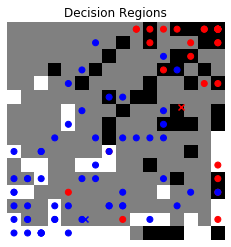

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Create a matrix for grid/image
predicted_labels_test_matrix = to_matrix(X_test_2d, predicted_labels_test)

fig, ax = plt.subplots()

X1 = X_test_2d[:,0]
X2 = X_test_2d[:,1]

# Plot feature test data in the 2D space as overlay
colors = ['blue' if label == -1 else 'red' for label in y_test.flatten()]
ax.scatter(X1, X2, c=colors)

# Plot class means as overlay
ax.scatter(class_means[0][0][1], class_means[0][0][0], marker='x', color='red', label='Class 3 mean')
ax.scatter(class_means[1][0][1], class_means[1][0][0], marker='x', color='blue', label='Class 9 mean')

# Set axis labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Regions')

# Display the image and scatter overlay
ax.imshow(predicted_labels_test_matrix)
plt.axis('off')
plt.show()

<div style="color: green; font-weight:
bold">Something went wrong here. I am not sure what the to_matrix function is supposed to do. But the idea was to calculate the distance to each mean for a point. If it is closer to the mean of 3 it is in the decision region of 3. Since your means are never used this can not work.</div>

# Exercise 3


## 3.1

In [148]:
def fit_lda(training_features, training_labels):
    # compute the class means
    class_means = []
    
    for label in np.unique(training_labels):
        class_means.append(np.mean(training_features[training_labels == label], axis=0))
        
    class_means = np.array(class_means)
    
    # compute the covariance matrix
    covmat = np.cov(training_features.T)
    print(covmat)
    
    # code from the sample solution
    global_feat = training_features - np.array(class_means)[training_labels]
    cov = np.dot(global_feat.T, global_feat)/training_features.shape[0]
    print(cov)
    
    # compute the prior probabilities
    p = []
    for label in np.unique(training_labels):
        p.append(len(training_features[np.argwhere(training_labels == label)]) / len(training_labels))
        
    return class_means, covmat, p

filtered_X_train = X_train[:, np.var(X_train, axis=0) > 0.001]

mu, covmat, p = fit_lda(X_train_2d, y_train)
mu2, covmat2, p2 = fit_lda(filtered_X_train, y_train)

[[ 30.96398703 -17.43960147]
 [-17.43960147  32.79595494]]
[[ 46.79606397 -31.12277042]
 [-31.12277042  44.50320441]]


<div style="color: green; font-weight:
bold">Using np.argwhere is unnecessary. Also using the np.cov function results in different covariance matrix than using the code from the solution.</div>

## 3.2

In [104]:
len_N_one = len(y_test[np.argwhere(y_test == 1)])
len_N_neg_one = len(y_test[np.argwhere(y_test == -1)])

def predict_lda(mu, covmat, p, test_features):
    predicted_labels = []
    for x_i in test_features:
        beta = np.dot(np.linalg.inv(covmat), (mu[0] - mu[1]).T)
        bias = -0.5 * np.dot(mu[0] - mu[1], beta) + np.log(len_N_one / len_N_neg_one)
        predicted_labels.append(np.sign(np.dot(x_i, beta) + bias))
        
    return predicted_labels

pred_labels_2d = predict_lda(mu, covmat, p, X_test_2d)

<div style="color: green; font-weight:
bold">Calculating beta and b in the for loop is unnecessary and ineffecient. You could use the priors p instead of calculating len_N_one. You could calculate the error of the predicted labels here for the training and test set. This could also be done for the case with all pixels.</div>

## 3.3

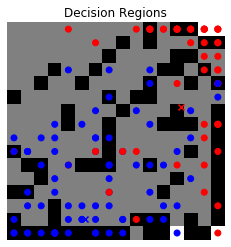

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Create a matrix for grid/image
predicted_labels_test_matrix = to_matrix(X_test_2d, pred_labels_2d)

fig, ax = plt.subplots()

X1 = X_train_2d[:,0]
X2 = X_train_2d[:,1]

# Plot feature test data in the 2D space as overlay
colors = ['blue' if label == -1 else 'red' for label in y_train.flatten()]
ax.scatter(X1, X2, c=colors)

# Plot class means as overlay
ax.scatter(class_means[0][0][1], class_means[0][0][0], marker='x', color='red', label='Class 3 mean')
ax.scatter(class_means[1][0][1], class_means[1][0][0], marker='x', color='blue', label='Class 9 mean')

# Set axis labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Regions')

# Display the image and scatter overlay
ax.imshow(predicted_labels_test_matrix)
plt.axis('off')
plt.show()

<div style="color: green; font-weight:
bold">Same as before the to_matrix seems to be wrong.</div>

# 3.4

In [106]:
def accuracy_score(y_true, y_pred):
    tp = 0
    tn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
    return (tp + tn) / len(y_true)

In [107]:
#from sklearn.datasets import load_digits
#from sklearn.model_selection import KFold
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#import numpy as np
#
#digits = load_digits()
#
## Load your feature data and corresponding labels
#X = X_all_2d
#y_true = digits.target[(digits.target == 3) | (digits.target == 9)]
#mu, covmat, p = fit_lda(X_all_2d, y_true)
#y_pred = predict_lda(mu, covmat, p, X_all_2d)
#
## Define the number of folds for cross-validation
#kfold = KFold(n_splits=10, shuffle=True, random_state=42)
#
## Iterate over the folds and compute the performance metrics
#accuracy_scores = []
#
#for train_idx, test_idx in kfold.split(X):
#    X_train, X_test = X[train_idx], X[test_idx]
#    y_train, y_test = y_true[train_idx], y_pred[test_idx]
#    
#    # Train the classifier on the training data
#    mu, covmat, p = fit_lda(X_train, y_train)
#    
#    # Evaluate the classifier on the test data
#    y_pred_test = predict_lda(mu, covmat, p, X_test)
#    
#    # Compute the performance metrics
#    accuracy_scores.append(accuracy_score(y_test, y_pred_test))
#
## Print the mean and standard deviation of the performance metrics
#print('Accuracy:', np.mean(accuracy_scores), np.std(accuracy_scores))


<div style="color: green; font-weight:
bold">I assume this was not finished</div>

## Exercise 4: SVM


In [108]:
X_train[0]

array([ 0.,  0.,  5., 15., 16., 15.,  1.,  0.,  0., 10., 16., 11.,  8.,
       16.,  5.,  0.,  0., 12., 10.,  1., 10., 15.,  1.,  0.,  0.,  0.,
        0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1., 10., 16., 10.,
        0.,  0.,  0.,  0.,  2.,  0.,  7., 16.,  0.,  0.,  0.,  8., 13.,
        5., 15., 12.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.])

In [109]:
y_train.shape

(217,)

In [110]:
def create_svm_labels(y):
    y_svm = y.copy()
    y_svm = np.where(y_svm==3, -1, np.where(y_svm==9, 1, y_svm))
    return y_svm

In [111]:
# Change labels to -1 and 1 for convenience
y_svm_train = create_svm_labels(y_train)
y_svm_test = create_svm_labels(y_test)

In [112]:
def fit_svm(training_features, training_labels, reg_lambda=100, learning_rate=0.002, max_epochs=100, min_error_rate=0.005):
    beta = np.random.normal(size=training_features.shape[1])
    b = 0
    N = len(training_labels)
    regularization_factor = reg_lambda / N

    prev_error_rate = float('inf')
    consecutive_count = 0
    losses = []
    error_rates = []

    for epoch in range(max_epochs):
        error_count = 0
        loss = 0

        for i, X in enumerate(training_features):
            beta_update, b_update = 0, 0
            if training_labels[i] * (np.dot(X, beta) + b) < 1:
                beta_update = beta - regularization_factor * training_labels[i] * X
                b_update = - training_labels[i]
                error_count += 1
                loss += 1 - training_labels[i] * (np.dot(X, beta) + b)
            else:
                beta_update = regularization_factor * beta
            beta-= learning_rate * beta_update
            b += learning_rate * b_update

        error_rate = error_count / N
        losses.append(loss)
        error_rates.append(error_rate)

        print(f"Epoch {epoch+1}, Error rate: {error_rate}")

        if error_rate <= min_error_rate:
            print("SVM Converged!")
            break
        elif error_rate >= prev_error_rate:
            consecutive_count += 1
            if consecutive_count >= 3:
                learning_rate /= 10
                print(f"Adjusting learning rate to {learning_rate}")
                consecutive_count = 0
        else:
            consecutive_count = 0
        prev_error_rate = error_rate

    return beta, b, losses, error_rates

In [113]:
beta, b, losses, error_rates = fit_svm(X_train, y_svm_train)

Epoch 1, Error rate: 0.47465437788018433
Epoch 2, Error rate: 0.30414746543778803
Epoch 3, Error rate: 0.16589861751152074
Epoch 4, Error rate: 0.1336405529953917
Epoch 5, Error rate: 0.09216589861751152
Epoch 6, Error rate: 0.055299539170506916
Epoch 7, Error rate: 0.03686635944700461
Epoch 8, Error rate: 0.059907834101382486
Epoch 9, Error rate: 0.04608294930875576
Epoch 10, Error rate: 0.04608294930875576
Epoch 11, Error rate: 0.07373271889400922
Epoch 12, Error rate: 0.03225806451612903
Epoch 13, Error rate: 0.07373271889400922
Epoch 14, Error rate: 0.03686635944700461
Epoch 15, Error rate: 0.055299539170506916
Epoch 16, Error rate: 0.055299539170506916
Epoch 17, Error rate: 0.09216589861751152
Adjusting learning rate to 0.0002
Epoch 18, Error rate: 0.05069124423963134
Epoch 19, Error rate: 0.027649769585253458
Epoch 20, Error rate: 0.027649769585253458
Epoch 21, Error rate: 0.02304147465437788
Epoch 22, Error rate: 0.018433179723502304
Epoch 23, Error rate: 0.02304147465437788
Epo

In [114]:
def plot_training(losses, training_errors):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.plot(losses, color='tab:red', label='Loss')

    ax2 = ax1.twinx()

    ax2.set_ylabel('Training Error')
    ax2.plot(training_errors, color='tab:blue', label='Training Error')

    fig.tight_layout()

    # add legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc='upper right')

    plt.show()


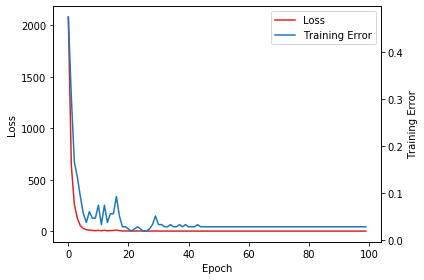

In [115]:
plot_training(losses, error_rates)

In [116]:
from sklearn.model_selection import KFold

def cross_validate_svm(training_features, training_labels):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    best_reg_lambda = None
    best_error_rate = float('inf')

    for reg_lambda in [0.001, 0.01, 0.1, 1, 10, 100]:
        error_rate_sum = 0

        for train_index, test_index in kf.split(training_features):
            X_train, X_test = training_features[train_index], training_features[test_index]
            y_train, y_test = training_labels[train_index], training_labels[test_index]
            beta, b, losses, error_rates = fit_svm(X_train, y_train, reg_lambda=reg_lambda)
            error_count = 0

            for i, X in enumerate(X_test):
                if y_test[i] * (np.dot(X, beta) + b) < 1:
                    error_count += 1
            error_rate = error_count / len(y_test)
            error_rate_sum += error_rate

        avg_error_rate = error_rate_sum / 5
        print(f"Reg lambda: {reg_lambda}, Average error rate: {avg_error_rate}")

        if avg_error_rate < best_error_rate:
            best_error_rate = avg_error_rate
            best_reg_lambda = reg_lambda

    print(f"Best regularization factor: {best_reg_lambda}, Best error rate: {best_error_rate}")
    return best_reg_lambda


In [117]:
cross_validate_svm(X_train, y_svm_train)

Epoch 1, Error rate: 0.2832369942196532
Epoch 2, Error rate: 0.2832369942196532
Epoch 3, Error rate: 0.28901734104046245
Epoch 4, Error rate: 0.28901734104046245
Adjusting learning rate to 0.0002
Epoch 5, Error rate: 0.28901734104046245
Epoch 6, Error rate: 0.2947976878612717
Epoch 7, Error rate: 0.30057803468208094
Adjusting learning rate to 2e-05
Epoch 8, Error rate: 0.30057803468208094
Epoch 9, Error rate: 0.30057803468208094
Epoch 10, Error rate: 0.30057803468208094
Adjusting learning rate to 2.0000000000000003e-06
Epoch 11, Error rate: 0.30057803468208094
Epoch 12, Error rate: 0.30057803468208094
Epoch 13, Error rate: 0.30057803468208094
Adjusting learning rate to 2.0000000000000004e-07
Epoch 14, Error rate: 0.30057803468208094
Epoch 15, Error rate: 0.30057803468208094
Epoch 16, Error rate: 0.30057803468208094
Adjusting learning rate to 2.0000000000000004e-08
Epoch 17, Error rate: 0.30057803468208094
Epoch 18, Error rate: 0.30057803468208094
Epoch 19, Error rate: 0.300578034682080

Epoch 76, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000004e-28
Epoch 77, Error rate: 0.5260115606936416
Epoch 78, Error rate: 0.5260115606936416
Epoch 79, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000004e-29
Epoch 80, Error rate: 0.5260115606936416
Epoch 81, Error rate: 0.5260115606936416
Epoch 82, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000005e-30
Epoch 83, Error rate: 0.5260115606936416
Epoch 84, Error rate: 0.5260115606936416
Epoch 85, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000006e-31
Epoch 86, Error rate: 0.5260115606936416
Epoch 87, Error rate: 0.5260115606936416
Epoch 88, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000007e-32
Epoch 89, Error rate: 0.5260115606936416
Epoch 90, Error rate: 0.5260115606936416
Epoch 91, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000008e-33
Epoch 92, Error rate: 0.5260115606936416
Epo

Epoch 48, Error rate: 0.5287356321839081
Epoch 49, Error rate: 0.5287356321839081
Adjusting learning rate to 2.0000000000000002e-19
Epoch 50, Error rate: 0.5287356321839081
Epoch 51, Error rate: 0.5287356321839081
Epoch 52, Error rate: 0.5287356321839081
Adjusting learning rate to 2.0000000000000002e-20
Epoch 53, Error rate: 0.5287356321839081
Epoch 54, Error rate: 0.5287356321839081
Epoch 55, Error rate: 0.5287356321839081
Adjusting learning rate to 2.0000000000000002e-21
Epoch 56, Error rate: 0.5287356321839081
Epoch 57, Error rate: 0.5287356321839081
Epoch 58, Error rate: 0.5287356321839081
Adjusting learning rate to 2e-22
Epoch 59, Error rate: 0.5287356321839081
Epoch 60, Error rate: 0.5287356321839081
Epoch 61, Error rate: 0.5287356321839081
Adjusting learning rate to 2.0000000000000002e-23
Epoch 62, Error rate: 0.5287356321839081
Epoch 63, Error rate: 0.5287356321839081
Epoch 64, Error rate: 0.5287356321839081
Adjusting learning rate to 2.0000000000000002e-24
Epoch 65, Error rate

Epoch 8, Error rate: 0.5375722543352601
Epoch 9, Error rate: 0.5375722543352601
Epoch 10, Error rate: 0.5375722543352601
Adjusting learning rate to 2e-05
Epoch 11, Error rate: 0.5375722543352601
Epoch 12, Error rate: 0.5375722543352601
Epoch 13, Error rate: 0.5375722543352601
Adjusting learning rate to 2.0000000000000003e-06
Epoch 14, Error rate: 0.5375722543352601
Epoch 15, Error rate: 0.5375722543352601
Epoch 16, Error rate: 0.5375722543352601
Adjusting learning rate to 2.0000000000000004e-07
Epoch 17, Error rate: 0.5375722543352601
Epoch 18, Error rate: 0.5375722543352601
Epoch 19, Error rate: 0.5375722543352601
Adjusting learning rate to 2.0000000000000004e-08
Epoch 20, Error rate: 0.5375722543352601
Epoch 21, Error rate: 0.5375722543352601
Epoch 22, Error rate: 0.5375722543352601
Adjusting learning rate to 2.0000000000000005e-09
Epoch 23, Error rate: 0.5375722543352601
Epoch 24, Error rate: 0.5375722543352601
Epoch 25, Error rate: 0.5375722543352601
Adjusting learning rate to 2.00

Epoch 72, Error rate: 0.4624277456647399
Epoch 73, Error rate: 0.4624277456647399
Adjusting learning rate to 2.0000000000000004e-27
Epoch 74, Error rate: 0.4624277456647399
Epoch 75, Error rate: 0.4624277456647399
Epoch 76, Error rate: 0.4624277456647399
Adjusting learning rate to 2.0000000000000004e-28
Epoch 77, Error rate: 0.4624277456647399
Epoch 78, Error rate: 0.4624277456647399
Epoch 79, Error rate: 0.4624277456647399
Adjusting learning rate to 2.0000000000000004e-29
Epoch 80, Error rate: 0.4624277456647399
Epoch 81, Error rate: 0.4624277456647399
Epoch 82, Error rate: 0.4624277456647399
Adjusting learning rate to 2.0000000000000005e-30
Epoch 83, Error rate: 0.4624277456647399
Epoch 84, Error rate: 0.4624277456647399
Epoch 85, Error rate: 0.4624277456647399
Adjusting learning rate to 2.0000000000000006e-31
Epoch 86, Error rate: 0.4624277456647399
Epoch 87, Error rate: 0.4624277456647399
Epoch 88, Error rate: 0.4624277456647399
Adjusting learning rate to 2.0000000000000007e-32
Epo

Epoch 41, Error rate: 0.4942528735632184
Epoch 42, Error rate: 0.4942528735632184
Epoch 43, Error rate: 0.4942528735632184
Adjusting learning rate to 2e-17
Epoch 44, Error rate: 0.4942528735632184
Epoch 45, Error rate: 0.4942528735632184
Epoch 46, Error rate: 0.4942528735632184
Adjusting learning rate to 2e-18
Epoch 47, Error rate: 0.4942528735632184
Epoch 48, Error rate: 0.4942528735632184
Epoch 49, Error rate: 0.4942528735632184
Adjusting learning rate to 2.0000000000000002e-19
Epoch 50, Error rate: 0.4942528735632184
Epoch 51, Error rate: 0.4942528735632184
Epoch 52, Error rate: 0.4942528735632184
Adjusting learning rate to 2.0000000000000002e-20
Epoch 53, Error rate: 0.4942528735632184
Epoch 54, Error rate: 0.4942528735632184
Epoch 55, Error rate: 0.4942528735632184
Adjusting learning rate to 2.0000000000000002e-21
Epoch 56, Error rate: 0.4942528735632184
Epoch 57, Error rate: 0.4942528735632184
Epoch 58, Error rate: 0.4942528735632184
Adjusting learning rate to 2e-22
Epoch 59, Err

Epoch 6, Error rate: 0.3872832369942196
Epoch 7, Error rate: 0.3872832369942196
Adjusting learning rate to 2e-05
Epoch 8, Error rate: 0.3872832369942196
Epoch 9, Error rate: 0.3872832369942196
Epoch 10, Error rate: 0.3872832369942196
Adjusting learning rate to 2.0000000000000003e-06
Epoch 11, Error rate: 0.3872832369942196
Epoch 12, Error rate: 0.3872832369942196
Epoch 13, Error rate: 0.3872832369942196
Adjusting learning rate to 2.0000000000000004e-07
Epoch 14, Error rate: 0.3872832369942196
Epoch 15, Error rate: 0.3872832369942196
Epoch 16, Error rate: 0.3872832369942196
Adjusting learning rate to 2.0000000000000004e-08
Epoch 17, Error rate: 0.3872832369942196
Epoch 18, Error rate: 0.3872832369942196
Epoch 19, Error rate: 0.3872832369942196
Adjusting learning rate to 2.0000000000000005e-09
Epoch 20, Error rate: 0.3872832369942196
Epoch 21, Error rate: 0.3872832369942196
Epoch 22, Error rate: 0.3872832369942196
Adjusting learning rate to 2.0000000000000006e-10
Epoch 23, Error rate: 0.

Epoch 78, Error rate: 0.4682080924855491
Epoch 79, Error rate: 0.4682080924855491
Adjusting learning rate to 2.0000000000000004e-29
Epoch 80, Error rate: 0.4682080924855491
Epoch 81, Error rate: 0.4682080924855491
Epoch 82, Error rate: 0.4682080924855491
Adjusting learning rate to 2.0000000000000005e-30
Epoch 83, Error rate: 0.4682080924855491
Epoch 84, Error rate: 0.4682080924855491
Epoch 85, Error rate: 0.4682080924855491
Adjusting learning rate to 2.0000000000000006e-31
Epoch 86, Error rate: 0.4682080924855491
Epoch 87, Error rate: 0.4682080924855491
Epoch 88, Error rate: 0.4682080924855491
Adjusting learning rate to 2.0000000000000007e-32
Epoch 89, Error rate: 0.4682080924855491
Epoch 90, Error rate: 0.4682080924855491
Epoch 91, Error rate: 0.4682080924855491
Adjusting learning rate to 2.0000000000000008e-33
Epoch 92, Error rate: 0.4682080924855491
Epoch 93, Error rate: 0.4682080924855491
Epoch 94, Error rate: 0.4682080924855491
Adjusting learning rate to 2.0000000000000007e-34
Epo

Epoch 22, Error rate: 0.5229885057471264
Adjusting learning rate to 2.0000000000000006e-10
Epoch 23, Error rate: 0.5229885057471264
Epoch 24, Error rate: 0.5229885057471264
Epoch 25, Error rate: 0.5229885057471264
Adjusting learning rate to 2.0000000000000005e-11
Epoch 26, Error rate: 0.5229885057471264
Epoch 27, Error rate: 0.5229885057471264
Epoch 28, Error rate: 0.5229885057471264
Adjusting learning rate to 2.0000000000000004e-12
Epoch 29, Error rate: 0.5229885057471264
Epoch 30, Error rate: 0.5229885057471264
Epoch 31, Error rate: 0.5229885057471264
Adjusting learning rate to 2.0000000000000003e-13
Epoch 32, Error rate: 0.5229885057471264
Epoch 33, Error rate: 0.5229885057471264
Epoch 34, Error rate: 0.5229885057471264
Adjusting learning rate to 2.0000000000000003e-14
Epoch 35, Error rate: 0.5229885057471264
Epoch 36, Error rate: 0.5229885057471264
Epoch 37, Error rate: 0.5229885057471264
Adjusting learning rate to 2e-15
Epoch 38, Error rate: 0.5229885057471264
Epoch 39, Error rate

Epoch 76, Error rate: 0.7109826589595376
Adjusting learning rate to 2.0000000000000004e-27
Epoch 77, Error rate: 0.7109826589595376
Epoch 78, Error rate: 0.7109826589595376
Epoch 79, Error rate: 0.7109826589595376
Adjusting learning rate to 2.0000000000000004e-28
Epoch 80, Error rate: 0.7109826589595376
Epoch 81, Error rate: 0.7109826589595376
Epoch 82, Error rate: 0.7109826589595376
Adjusting learning rate to 2.0000000000000004e-29
Epoch 83, Error rate: 0.7109826589595376
Epoch 84, Error rate: 0.7109826589595376
Epoch 85, Error rate: 0.7109826589595376
Adjusting learning rate to 2.0000000000000005e-30
Epoch 86, Error rate: 0.7109826589595376
Epoch 87, Error rate: 0.7109826589595376
Epoch 88, Error rate: 0.7109826589595376
Adjusting learning rate to 2.0000000000000006e-31
Epoch 89, Error rate: 0.7109826589595376
Epoch 90, Error rate: 0.7109826589595376
Epoch 91, Error rate: 0.7109826589595376
Adjusting learning rate to 2.0000000000000007e-32
Epoch 92, Error rate: 0.7109826589595376
Epo

Epoch 34, Error rate: 0.5919540229885057
Epoch 35, Error rate: 0.5919540229885057
Epoch 36, Error rate: 0.5919540229885057
Adjusting learning rate to 2.0000000000000003e-14
Epoch 37, Error rate: 0.5919540229885057
Epoch 38, Error rate: 0.5919540229885057
Epoch 39, Error rate: 0.5919540229885057
Adjusting learning rate to 2e-15
Epoch 40, Error rate: 0.5919540229885057
Epoch 41, Error rate: 0.5919540229885057
Epoch 42, Error rate: 0.5919540229885057
Adjusting learning rate to 2.0000000000000002e-16
Epoch 43, Error rate: 0.5919540229885057
Epoch 44, Error rate: 0.5919540229885057
Epoch 45, Error rate: 0.5919540229885057
Adjusting learning rate to 2e-17
Epoch 46, Error rate: 0.5919540229885057
Epoch 47, Error rate: 0.5919540229885057
Epoch 48, Error rate: 0.5919540229885057
Adjusting learning rate to 2e-18
Epoch 49, Error rate: 0.5919540229885057
Epoch 50, Error rate: 0.5919540229885057
Epoch 51, Error rate: 0.5919540229885057
Adjusting learning rate to 2.0000000000000002e-19
Epoch 52, Err

Epoch 92, Error rate: 0.4827586206896552
Epoch 93, Error rate: 0.4827586206896552
Epoch 94, Error rate: 0.4827586206896552
Adjusting learning rate to 2.0000000000000007e-34
Epoch 95, Error rate: 0.4827586206896552
Epoch 96, Error rate: 0.4827586206896552
Epoch 97, Error rate: 0.4827586206896552
Adjusting learning rate to 2.0000000000000008e-35
Epoch 98, Error rate: 0.4827586206896552
Epoch 99, Error rate: 0.4827586206896552
Epoch 100, Error rate: 0.4827586206896552
Adjusting learning rate to 2.000000000000001e-36
Epoch 1, Error rate: 0.5114942528735632
Epoch 2, Error rate: 0.5114942528735632
Epoch 3, Error rate: 0.5172413793103449
Epoch 4, Error rate: 0.5172413793103449
Adjusting learning rate to 0.0002
Epoch 5, Error rate: 0.5172413793103449
Epoch 6, Error rate: 0.5172413793103449
Epoch 7, Error rate: 0.5172413793103449
Adjusting learning rate to 2e-05
Epoch 8, Error rate: 0.5172413793103449
Epoch 9, Error rate: 0.5172413793103449
Epoch 10, Error rate: 0.5172413793103449
Adjusting lea

Epoch 75, Error rate: 0.08670520231213873
Epoch 76, Error rate: 0.08670520231213873
Adjusting learning rate to 2e-18
Epoch 77, Error rate: 0.08670520231213873
Epoch 78, Error rate: 0.08670520231213873
Epoch 79, Error rate: 0.08670520231213873
Adjusting learning rate to 2.0000000000000002e-19
Epoch 80, Error rate: 0.08670520231213873
Epoch 81, Error rate: 0.08670520231213873
Epoch 82, Error rate: 0.08670520231213873
Adjusting learning rate to 2.0000000000000002e-20
Epoch 83, Error rate: 0.08670520231213873
Epoch 84, Error rate: 0.08670520231213873
Epoch 85, Error rate: 0.08670520231213873
Adjusting learning rate to 2.0000000000000002e-21
Epoch 86, Error rate: 0.08670520231213873
Epoch 87, Error rate: 0.08670520231213873
Epoch 88, Error rate: 0.08670520231213873
Adjusting learning rate to 2e-22
Epoch 89, Error rate: 0.08670520231213873
Epoch 90, Error rate: 0.08670520231213873
Epoch 91, Error rate: 0.08670520231213873
Adjusting learning rate to 2.0000000000000002e-23
Epoch 92, Error rate

Epoch 9, Error rate: 0.16666666666666666
Epoch 10, Error rate: 0.13218390804597702
Epoch 11, Error rate: 0.10344827586206896
Epoch 12, Error rate: 0.09195402298850575
Epoch 13, Error rate: 0.06896551724137931
Epoch 14, Error rate: 0.06896551724137931
Epoch 15, Error rate: 0.06896551724137931
Epoch 16, Error rate: 0.06896551724137931
Adjusting learning rate to 0.0002
Epoch 17, Error rate: 0.09195402298850575
Epoch 18, Error rate: 0.06896551724137931
Epoch 19, Error rate: 0.06321839080459771
Epoch 20, Error rate: 0.06321839080459771
Epoch 21, Error rate: 0.05747126436781609
Epoch 22, Error rate: 0.06321839080459771
Epoch 23, Error rate: 0.05747126436781609
Epoch 24, Error rate: 0.05747126436781609
Epoch 25, Error rate: 0.06321839080459771
Epoch 26, Error rate: 0.05747126436781609
Epoch 27, Error rate: 0.06321839080459771
Epoch 28, Error rate: 0.05747126436781609
Epoch 29, Error rate: 0.06321839080459771
Epoch 30, Error rate: 0.05747126436781609
Epoch 31, Error rate: 0.05747126436781609
E

Epoch 59, Error rate: 0.023121387283236993
Epoch 60, Error rate: 0.023121387283236993
Adjusting learning rate to 2.0000000000000004e-08
Epoch 61, Error rate: 0.017341040462427744
Epoch 62, Error rate: 0.017341040462427744
Epoch 63, Error rate: 0.017341040462427744
Epoch 64, Error rate: 0.017341040462427744
Adjusting learning rate to 2.0000000000000005e-09
Epoch 65, Error rate: 0.017341040462427744
Epoch 66, Error rate: 0.017341040462427744
Epoch 67, Error rate: 0.017341040462427744
Adjusting learning rate to 2.0000000000000006e-10
Epoch 68, Error rate: 0.017341040462427744
Epoch 69, Error rate: 0.017341040462427744
Epoch 70, Error rate: 0.017341040462427744
Adjusting learning rate to 2.0000000000000005e-11
Epoch 71, Error rate: 0.017341040462427744
Epoch 72, Error rate: 0.017341040462427744
Epoch 73, Error rate: 0.017341040462427744
Adjusting learning rate to 2.0000000000000004e-12
Epoch 74, Error rate: 0.017341040462427744
Epoch 75, Error rate: 0.017341040462427744
Epoch 76, Error rat

Epoch 11, Error rate: 0.04597701149425287
Adjusting learning rate to 0.0002
Epoch 12, Error rate: 0.06321839080459771
Epoch 13, Error rate: 0.034482758620689655
Epoch 14, Error rate: 0.005747126436781609
Epoch 15, Error rate: 0.034482758620689655
Epoch 16, Error rate: 0.011494252873563218
Epoch 17, Error rate: 0.011494252873563218
Epoch 18, Error rate: 0.011494252873563218
Epoch 19, Error rate: 0.011494252873563218
Adjusting learning rate to 2e-05
Epoch 20, Error rate: 0.011494252873563218
Epoch 21, Error rate: 0.011494252873563218
Epoch 22, Error rate: 0.0
SVM Converged!
Epoch 1, Error rate: 0.5862068965517241
Epoch 2, Error rate: 0.39655172413793105
Epoch 3, Error rate: 0.25287356321839083
Epoch 4, Error rate: 0.15517241379310345
Epoch 5, Error rate: 0.11494252873563218
Epoch 6, Error rate: 0.05747126436781609
Epoch 7, Error rate: 0.04597701149425287
Epoch 8, Error rate: 0.04597701149425287
Epoch 9, Error rate: 0.08045977011494253
Epoch 10, Error rate: 0.08045977011494253
Adjusting l

100

In [118]:
def predict_svm(X, beta, b):
    predictions = np.sign(np.dot(X, beta) + b)
    return predictions

In [119]:
correct_pred = 0

for i, X in enumerate(X_test):
    pred = predict_svm(X, beta, b)
    if y_svm_test[i] == pred:
        correct_pred +=1

print(f"Accuracy : {correct_pred * 100 / y_svm_test.shape[0]} %")

Accuracy : 98.63013698630137 %


In [120]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC()

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100} %")


Accuracy: 98.63013698630137 %


I:\Uni\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
